# Introducción a la regresión lineal
Este notebook se basa en el artículo https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

La regresión lineal permite predecir una variable cuantitativa, como el precio de una casa o la calidad de un vino. Se denomina *lineal* porque asume una relación que en un gráfico bidimensional se puede representar como una recta:

![Relación lineal](../img/linear.png)

La ecuación de esta recta es:

## $Y = b_0 + b_1 x$

donde $x$ es la variable del eje horizontal, $Y$ la del eje vertical, $b_0$ es la ordenada en el origen (valor de $Y$ cuando $x$ es 0), y $b_1$ es la pendiente de la recta. En lugar de utilizar una única variable $x$ para predecir $Y$ podemos usar muchas variables $x_1$, $x_2$, ..., $x_n$:

## $Y = b_0 + b_1 x_1 + b_2 x_2 + \cdots + b_n x_n$

Esta ecuación en lugar de una recta representa un *hiperplano*, que aunque conceptualmente es mucho más complejo, matemáticamente es equivalente para el ordenador: la técnica para operar es la misma. A grandes rasgos, se trata de colocar la recta lo más cerca posible de los puntos sobre los que se ajusta. Matemáticamente se trata de un problema de minimización de errores.

![Relación lineal](../img/linear_ani.gif)

Utilizaremos la regresión lineal para predecir el valor de una vivienda en función de algunas de sus características. Descargamos el dataset, lo cargamos en Colab y cargamos las librerías que necesitaremos en el análisis.

In [1]:
##### DOWNLOAD DATASET. ONLY IN COLAB !!!
!wget -P ./../../Datasets/Tabular/ https://raw.githubusercontent.com/CenticMurcia/curso-ciencia-datos/master/Datasets/Tabular/house-prices-train.csv

--2020-02-11 13:33:52--  https://raw.githubusercontent.com/CenticMurcia/curso-ciencia-datos/master/data/house-prices-train.csv
Resolviendo raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.192.133, 151.101.128.133, 151.101.64.133, ...
Conectando con raw.githubusercontent.com (raw.githubusercontent.com)[151.101.192.133]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 460676 (450K) [text/plain]
Guardando como: “./../data/house-prices-train.csv.1”

house-prices-train. 100%[===================>] 449,88K  2,06MB/s    en 0,2s    

2020-02-11 13:33:53 (2,06 MB/s) - “./../data/house-prices-train.csv.1” guardado [460676/460676]



In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

In [2]:
dataset = pd.read_csv('../../Datasets/Tabular/house-prices-train.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
dataset.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


Vemos que el dataset tiene 1460 filas (casas) y 81 columnas (características de las casas). Si queréis una descripción detallada de lo que representa cada variable podéis echar un vistazo aquí:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Vamos a predecir con la mayor precisión posible el precio de la vivienda en función de las variables de que disponemos. Para simplificar el problema vamos a seleccionar un número limitado de variables que podemos considerar a priori como importantes:

* OverallQual: Calidad general de los materiales y las terminaciones
* GrLivArea: Superficie habitable sobre la planta baja en pies cuadrados
* GarageCars: Cuántos coches caben en el garage
* GarageArea: Superficie del garaga en pies cuadrados
* TotalBsmtSF: Superficie total del sótano
* 1stFlrSF: Superficie total de la primera planta
* FullBath: Baños completos
* TotRmsAbvGrd: Número de habitaciones sobre la planta baja
* YearBuilt: Año de construcción
* YearRemodAdd: Año de remodelación




In [5]:
dataset = dataset[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 
                   'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 
                   'YearBuilt', 'YearRemodAdd', 'SalePrice']]

In [6]:
dataset.describe()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1515.463699,1.767123,472.980137,1057.429452,1162.626712,1.565068,6.517808,1971.267808,1984.865753,180921.195890
std,1.382997,525.480383,0.747315,213.804841,438.705324,386.587738,0.550916,1.625393,30.202904,20.645407,79442.502883
min,1.000000,334.000000,0.000000,0.000000,0.000000,334.000000,0.000000,2.000000,1872.000000,1950.000000,34900.000000
25%,5.000000,1129.500000,1.000000,334.500000,795.750000,882.000000,1.000000,5.000000,1954.000000,1967.000000,129975.000000
50%,6.000000,1464.000000,2.000000,480.000000,991.500000,1087.000000,2.000000,6.000000,1973.000000,1994.000000,163000.000000
75%,7.000000,1776.750000,2.000000,576.000000,1298.250000,1391.250000,2.000000,7.000000,2000.000000,2004.000000,214000.000000
max,10.000000,5642.000000,4.000000,1418.000000,6110.000000,4692.000000,3.000000,14.000000,2010.000000,2010.000000,755000.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   OverallQual   1460 non-null   int64
 1   GrLivArea     1460 non-null   int64
 2   GarageCars    1460 non-null   int64
 3   GarageArea    1460 non-null   int64
 4   TotalBsmtSF   1460 non-null   int64
 5   1stFlrSF      1460 non-null   int64
 6   FullBath      1460 non-null   int64
 7   TotRmsAbvGrd  1460 non-null   int64
 8   YearBuilt     1460 non-null   int64
 9   YearRemodAdd  1460 non-null   int64
 10  SalePrice     1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB


Tenemos ahora 1460 filas y 11 columnas de variables cuantitativas, sin valores perdidos. Podemos hacer un EDA básico:

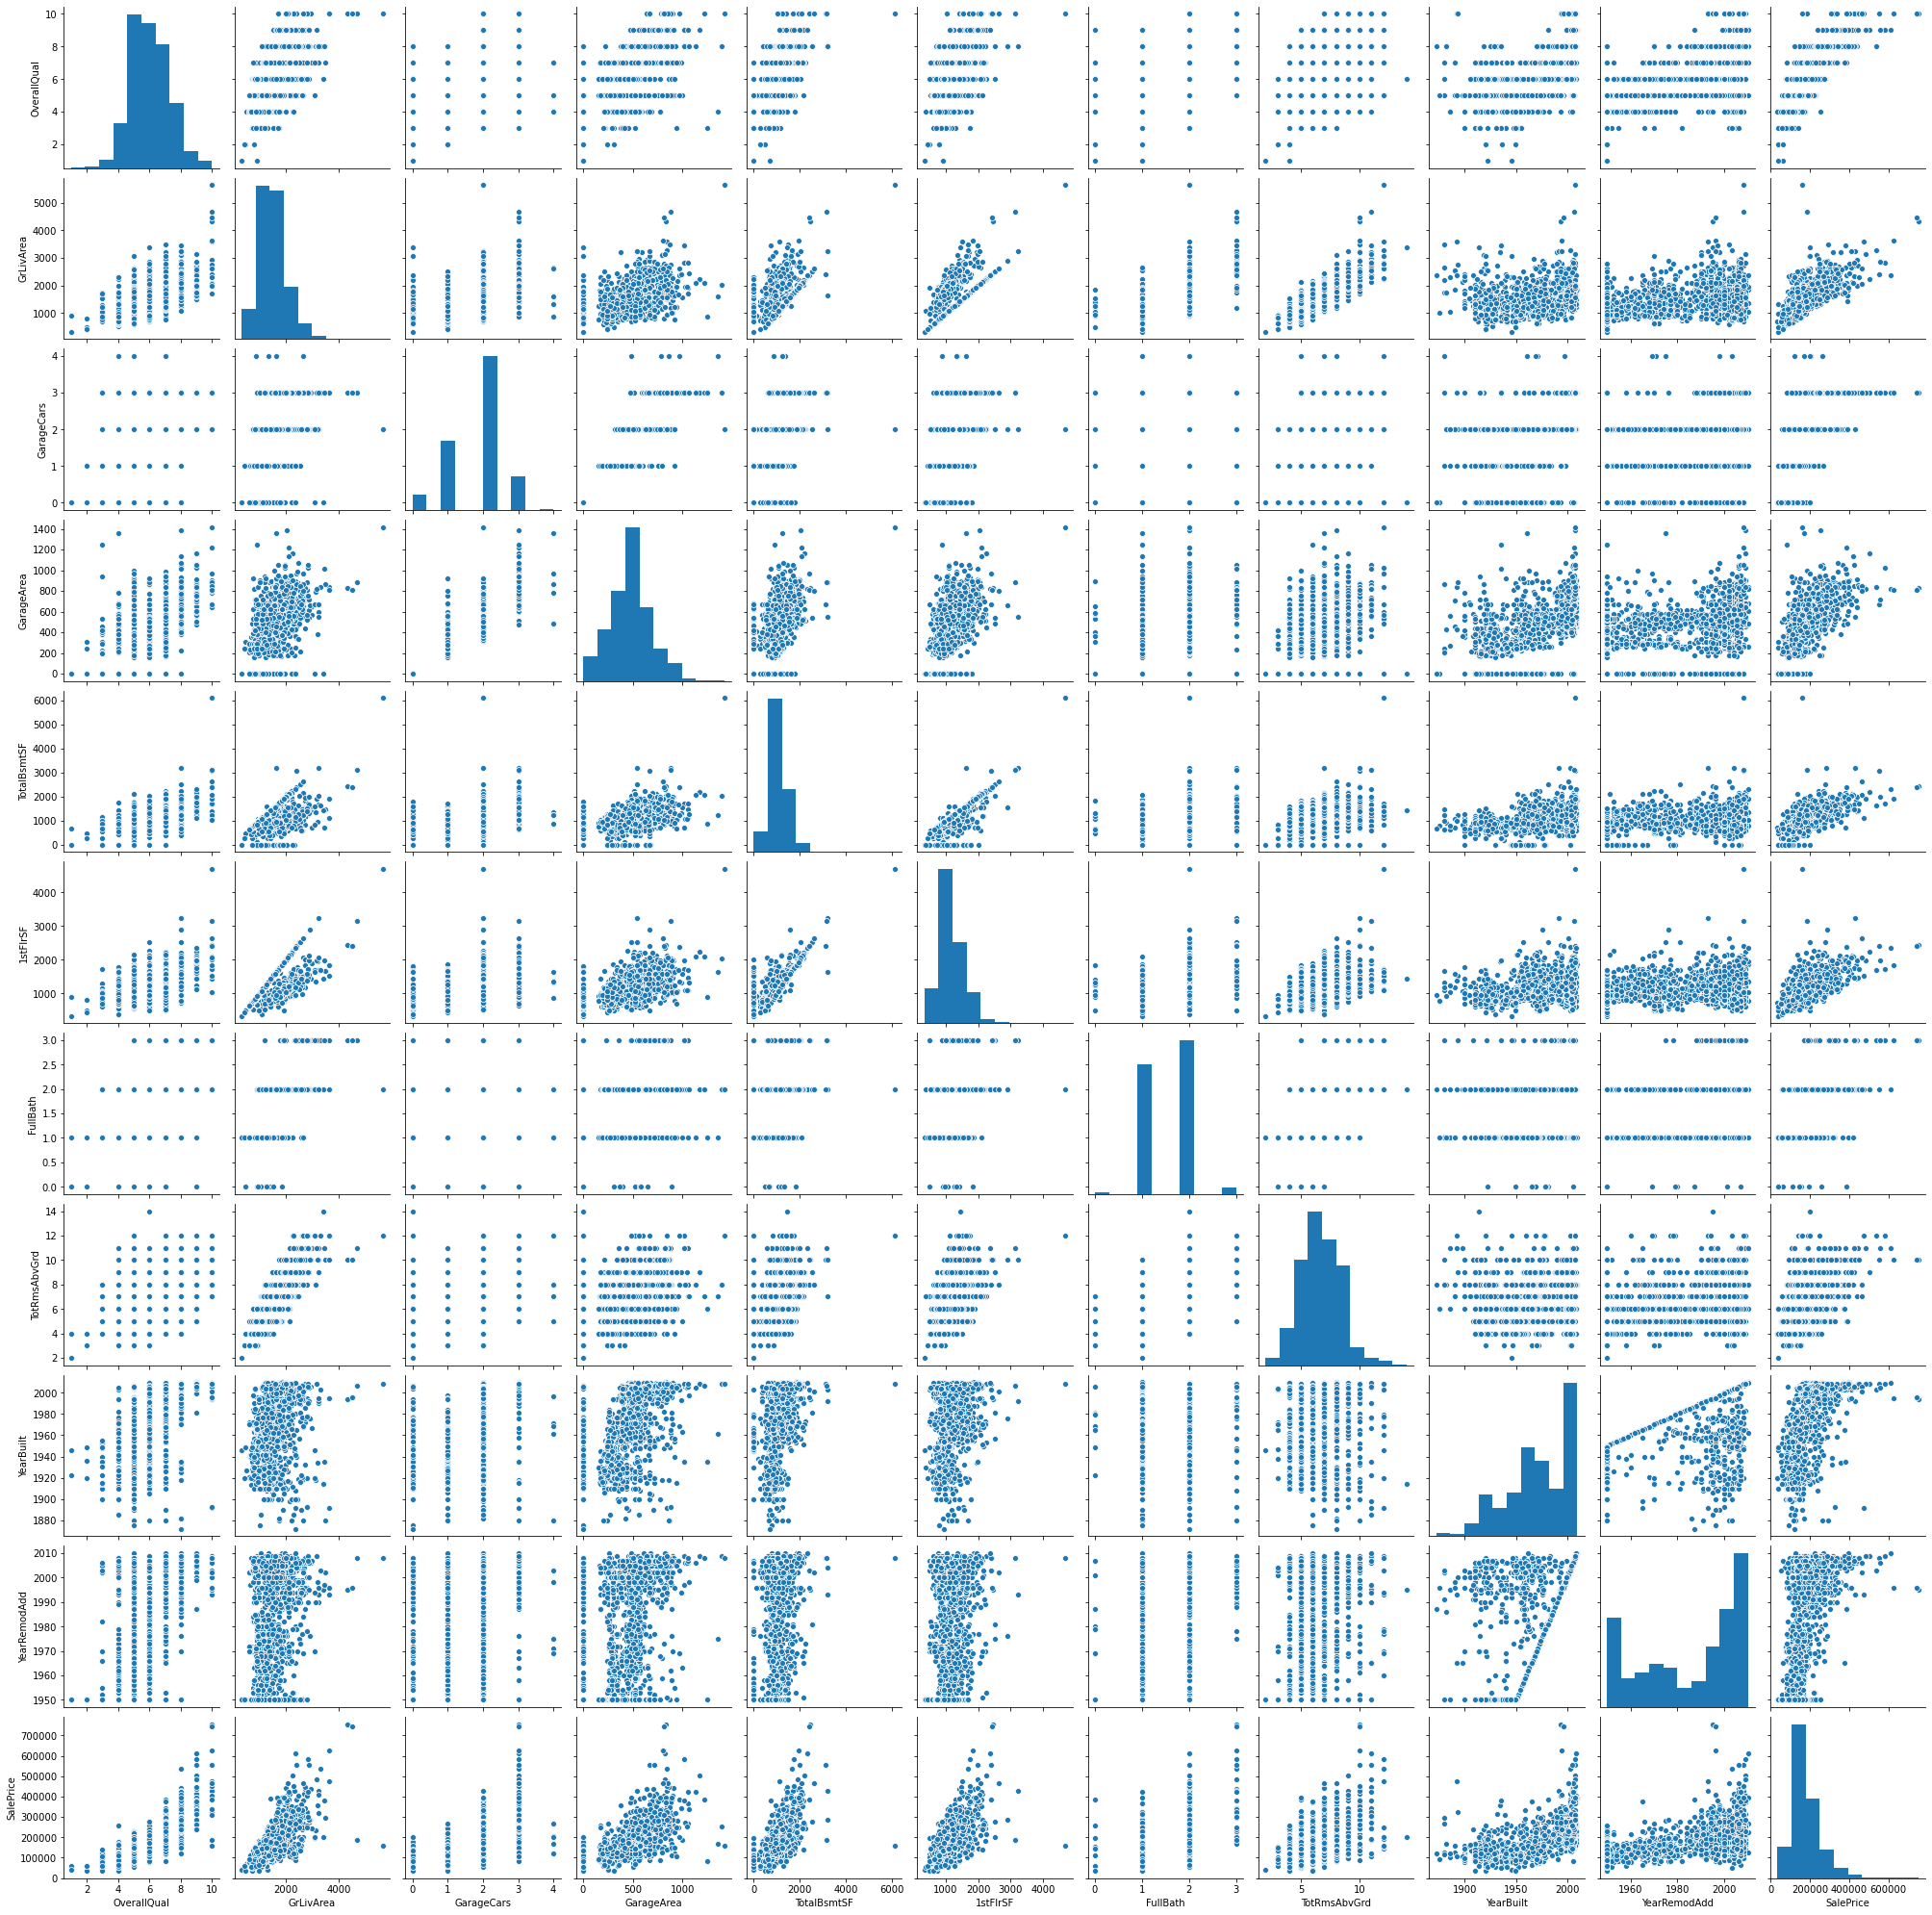

In [8]:
g = sns.pairplot(dataset)

Vemos que hay varias variables que parecen estar correlacionadas con SalePrice (última fila). Podemos hacer un gráfico de correlación:

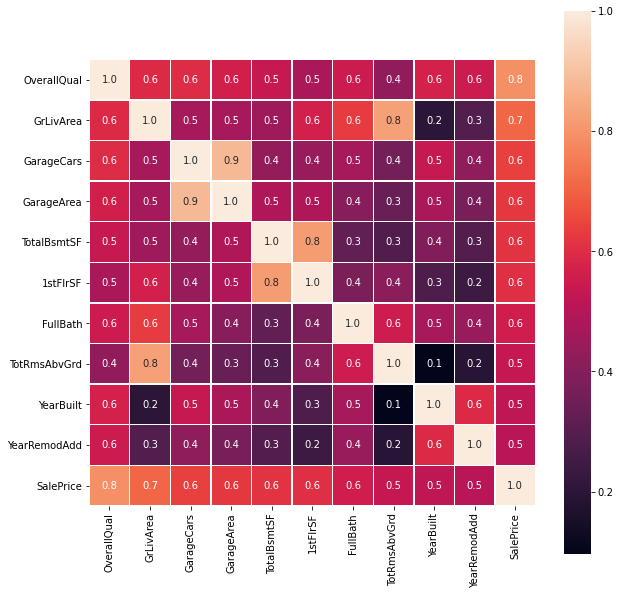

In [8]:
f, ax = plt.subplots(figsize=(10, 10))
g = sns.heatmap(dataset.corr(), annot=True, linewidths=0.4, fmt='.1f', square=True, ax=ax)

Un factor de correlación entre dos variables igual a 1 indica correlación positiva perfecta: cuando una variable crece, la otra lo hace al mismo ritmo. Si es -1, cuando una crece la otra decrece. Una correlación de 0 indica que ambas variables se comportan de manera totalmente independiente. Todas las variables que hemos seleccionado tienen coeficientes de correlación iguales o mayores de 0.5 con SalePrice, por lo que esperamos que nos aporten información que nos permita predecir el precio de venta de una casa.

Aunque las variables GarageCars y FullBaths son cualitativas, se comportan más bien como categorías, ya que tienen muy pocos posibles valores: GarageCars oscila entre 0 y 4, y FullBaths entre 0 y 3. Hagamos una representación con *violinplots*. Vemos que efectivamente el precio se incrementa de manera aproximadamente lineal con ambas, aunque curiosamente cuando GarageCars es 4 el precio baja.

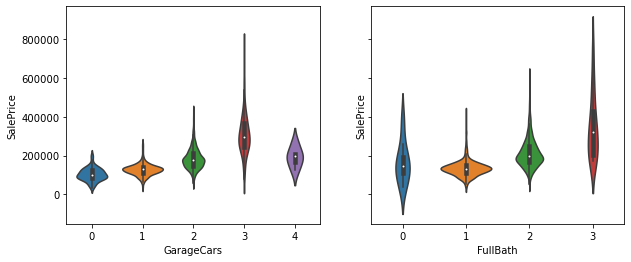

In [9]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

g = sns.violinplot(x=dataset['GarageCars'], y=dataset['SalePrice'], ax=axes[0])
g = sns.violinplot(x=dataset['FullBath'], y=dataset['SalePrice'], ax=axes[1])

Ahora creamos el dataset de entrenamiento con el 70% de los datos y el de test con el 30% restante:

In [10]:
features = dataset.drop(columns='SalePrice')
targets = pd.DataFrame(dataset['SalePrice'])

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.3, 
                                                    random_state = 42)

# Entrenar modelo

Ya podemos entrenar un modelo lineal, hacer predicciones y calcular algunos parámetros de calidad:

In [11]:
lr = LinearRegression()
    
# Train the model
lr.fit(X_train, y_train)

LinearRegression()

# Make predictions

In [12]:
y_pred = lr.predict(X_test)

# Métricas

MAE: 24355.867682161985
MSE: 1387787630.8180647
R2:  0.8011222436439063


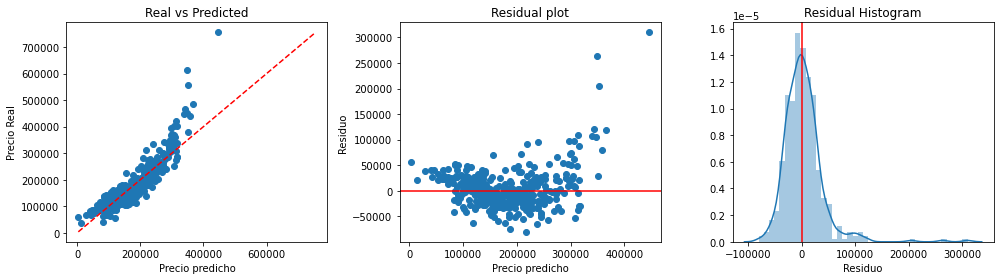

In [16]:
def plot_regr_metric(y_pred, y_test):
    
    print("MAE:", metrics.mean_absolute_error(y_test, y_pred)) # Mean absolute error
    print("MSE:", metrics.mean_squared_error(y_test, y_pred)) # Mean squared error
    print("R2: ", metrics.r2_score(y_test, y_pred)) # Coefficient of determination

    residuals = y_test-y_pred

    mn = min(y_test.min()[0], y_pred.min())
    mx = max(y_test.max()[0], y_pred.max())
    plt.figure(figsize=(14,4))
    plt.subplot(131)
    plt.plot( [mn, mx],[mn, mx], "r--")
    plt.scatter(x = y_pred, y = y_test)
    plt.title('Real vs Predicted')
    plt.xlabel('Precio predicho')
    plt.ylabel('Precio Real')
    
    plt.subplot(132)
    plt.scatter(x = y_pred, y = residuals)
    plt.axhline(y=0, color='r')
    plt.title('Residual plot')
    plt.xlabel('Precio predicho')
    plt.ylabel('Residuo')
    
    plt.subplot(133)
    sns.distplot(residuals);
    plt.axvline(x=0, color='r')
    plt.title('Residual Histogram')
    plt.xlabel('Residuo')
    
    plt.tight_layout() #plt.show()
    
plot_regr_metric(y_pred, y_test)

Vemos que el modelo es razonablemente bueno ($R² = 0.80$). Vamos a representar las predicciones y los precios correctos, para ver las diferencias. Si las predicciones son buenas deben aparecer puntos muy cercanos a la diagonal de la gráfica, marcada en rojo:

Otra manera de estudiar la calidad del modelo es representar el error en la predicción (y_test - y_pred), también denominado *residuo* frente al valor predicho (y_pred). Esta representación nos permitirá estimar la magnitud del error de nuestras predicciones:

Idealmente los residuos deben repartirse homogéneamente alrededor de cero (línea roja), pero vemos que no es así. El precio de las casas más baratas (hasta 100000 dólares) parece estar sobre-estimado. Las casa de entre 150000 y 200000 dólares está infra-valoradas, y por encima de 300000 dólares vuelven a estar de nuevo sobre-valoradas. En promedio, el error oscila entre $\pm 80000$ dólares aproximadamente. Este típo de gráficas son muy útiles para evaluar los modelos de regresión, se hayan creado usando técnicas lineales u otras más sofisticadas: las representaciones son igualmente válidas.

### Coeficientes
Vamos a echar un vistazo a los coeficientes del modelo, que nos indican cómo afecta cada variable al precio final predicho de la casa:

In [18]:
coefs = pd.DataFrame(data=lr.coef_[0].tolist(), index=X_train.columns, columns = ["Coefs"]).sort_values(by="Coefs")
coefs

,Coefs
FullBath,-6968.063288
GarageArea,7.521263
TotalBsmtSF,12.057829
1stFlrSF,15.303836
GrLivArea,46.415115
YearBuilt,289.106875
YearRemodAdd,304.456332
TotRmsAbvGrd,594.193773
GarageCars,14181.862962
OverallQual,19706.155920


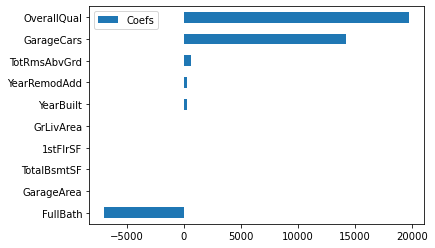

In [19]:
coefs.plot.barh();

Vemos que por cada unidad que se incrementa la calidad de la casa (OverallQual), el precio se incrementa en 19706 dólares, por cada pie cuadrado que se incrementa la superficie en la planta baja (GrLivArea) el precio aumenta 46.4 dólares, etc. Se puede observar que el precio del pie cuadrado de garaje es bastante más bajo que el de vivienda (7.5 dolares).

# Mejora (separar casas baratas vs caras)
Para mejorar el modelo podríamos, por ejemplo, dividir los datos en dos partes (las casas por debajo de 300000 dólares y las que están por encima de ese valor) y crear dos modelos distintos. A la hora de hacer una predicción con nuevos datos usaríamos los dos modelos, el *barato* y el *caro*. Si usamos el modelo *barato* con datos nuevos y nos sale una predicción mayor de 300000 dólares, la descartamos y usamos el modelo *caro*, y viceversa.

### Modelo BARATO (< 300000)

MAE: 18038.911168295643
MSE: 672155423.8917538
R2:  0.7445695435191522


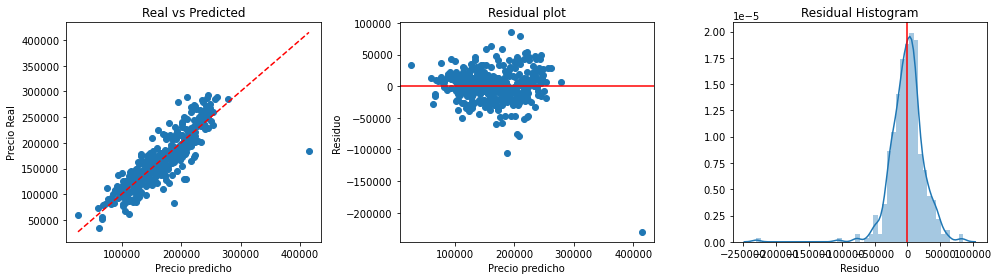

In [20]:
features = dataset[dataset['SalePrice'] < 300000].drop(columns='SalePrice')
targets = pd.DataFrame(dataset['SalePrice'][dataset['SalePrice'] < 300000])

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

lr_barato = LinearRegression()     # Create model
lr_barato.fit(X_train, y_train)    # Train the model
y_pred = lr_barato.predict(X_test) # Make predictions

plot_regr_metric(y_pred, y_test)

### Modelo CARO (> 300000)

MAE: 38926.99827925345
MSE: 2925961612.426678
R2:  0.5833815009505324


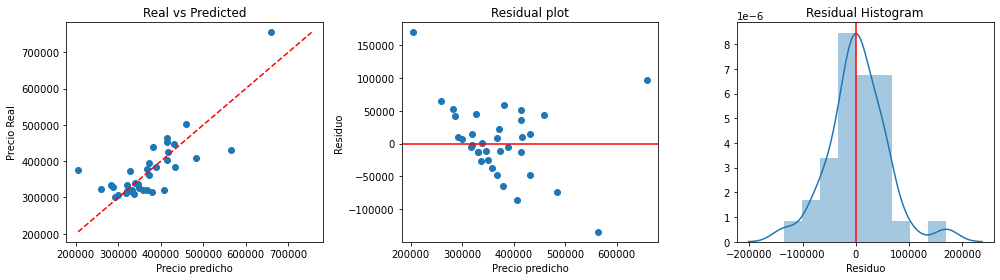

In [21]:
features = dataset[dataset['SalePrice'] >= 300000].drop(columns='SalePrice')
targets = pd.DataFrame(dataset['SalePrice'][dataset['SalePrice'] >= 300000])

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

lr_caro = LinearRegression()     # Create model
lr_caro.fit(X_train, y_train)    # Train the model
y_pred = lr_caro.predict(X_test) # Make predictions

plot_regr_metric(y_pred, y_test)

Vemos que el modelo *barato* funciona bastante bien, aunque hay una casa con un error muy grande, aquella para la que se predice un coste de más de 400000 dólares y finalmente termina costando menos de 300000 (ojo, esta casa pordía resultar una verdadera ganga, aunque su verdadero precio debería determinarse con el modelo *caro*). El error oscila entre $\pm 50000$ dólares. Por el contrario, el modelo de las casas caras funciona bastante peor, con unos errores que se desvían bastante de la línea roja y que oscilan entre $\pm 100000$ dólares, casi el doble.